In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
import warnings
warnings.filterwarnings('ignore')

In [219]:
df=pd.read_csv(r'C:\Users\narra\OneDrive\Desktop\projects\Data Science\Covid 19 Forecaste\covid_19_clean_complete.csv')

In [220]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [222]:
df.shape

(49068, 10)

In [223]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

**As I think for forecasting, we require only Country/Region, Date, Confirmed columns.**

In [224]:
df.rename(columns={"Province/State":"State", "Country/Region":"Country"}, inplace=True)

In [225]:
df.Date.value_counts()

Date
2020-01-22    261
2020-05-30    261
2020-05-21    261
2020-05-22    261
2020-05-23    261
             ... 
2020-03-26    261
2020-03-27    261
2020-03-28    261
2020-03-29    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [226]:
df.Date.max()

'2020-07-27'

**we can say that the max date is 7th July 2020**

In [227]:
df[df["Date"]=="2020-01-22"]

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
256,NaN,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,NaN,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,NaN,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,NaN,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


In [228]:
df[df["Date"]=="2020-07-27"]

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


When we compare the Confirmed at 1st and last date, there is an increase in cases

In [229]:
top=df[df["Date"]=="2020-07-27"]

In [230]:
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


Now I am going to group data based on country

In [231]:
df.columns


Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [232]:
top.groupby("Country")[['Confirmed', 'Deaths',
       'Recovered', 'Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [233]:
confirmed=df.groupby("Date")['Confirmed'].sum().reset_index()

In [234]:
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


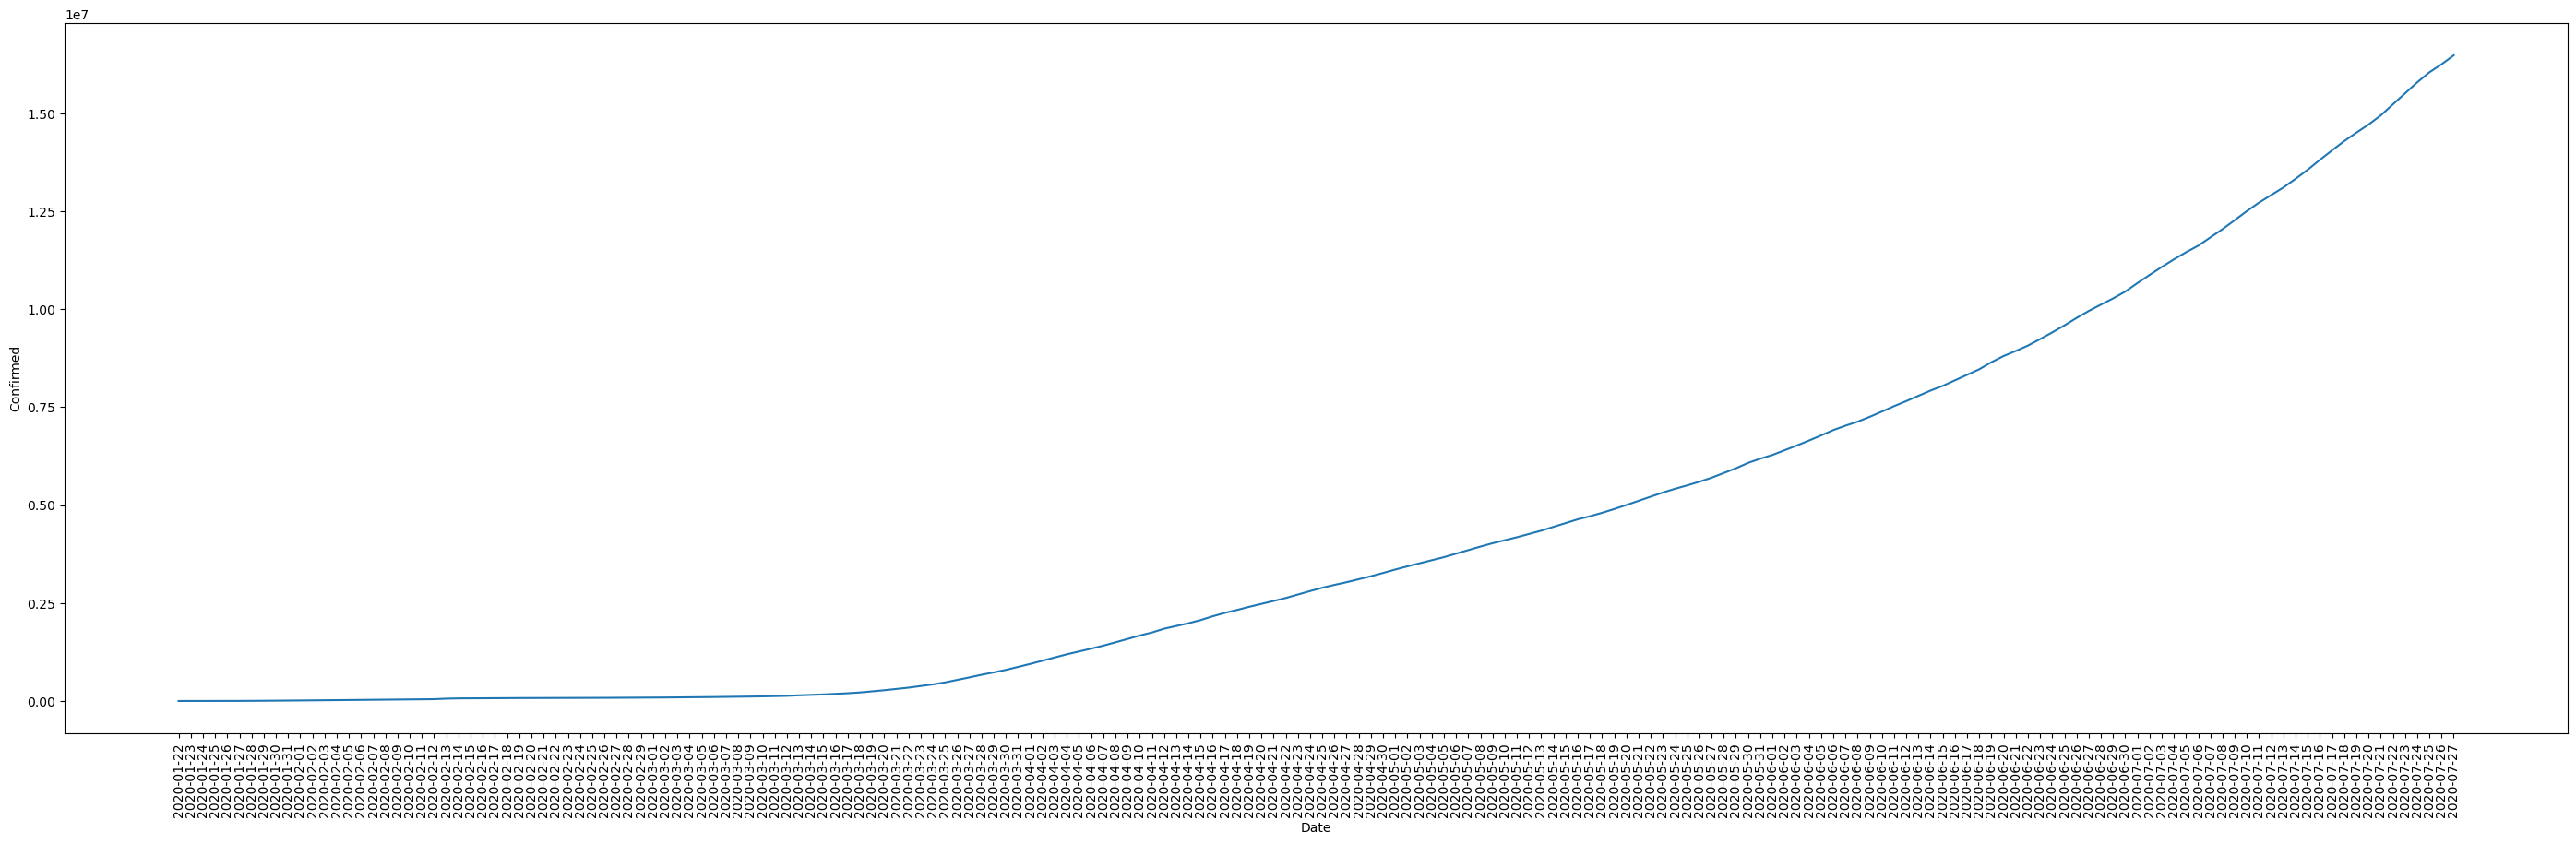

In [235]:
plt.figure(figsize=(35,10))
sns.lineplot(data=confirmed,x= 'Date', y= 'Confirmed')
plt.xticks(rotation=90)
plt.show()

As we see that the Confirmed cases are increasing from start date to end date

In [236]:
death=df.groupby("Date")['Deaths'].sum().reset_index()

In [237]:
death

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


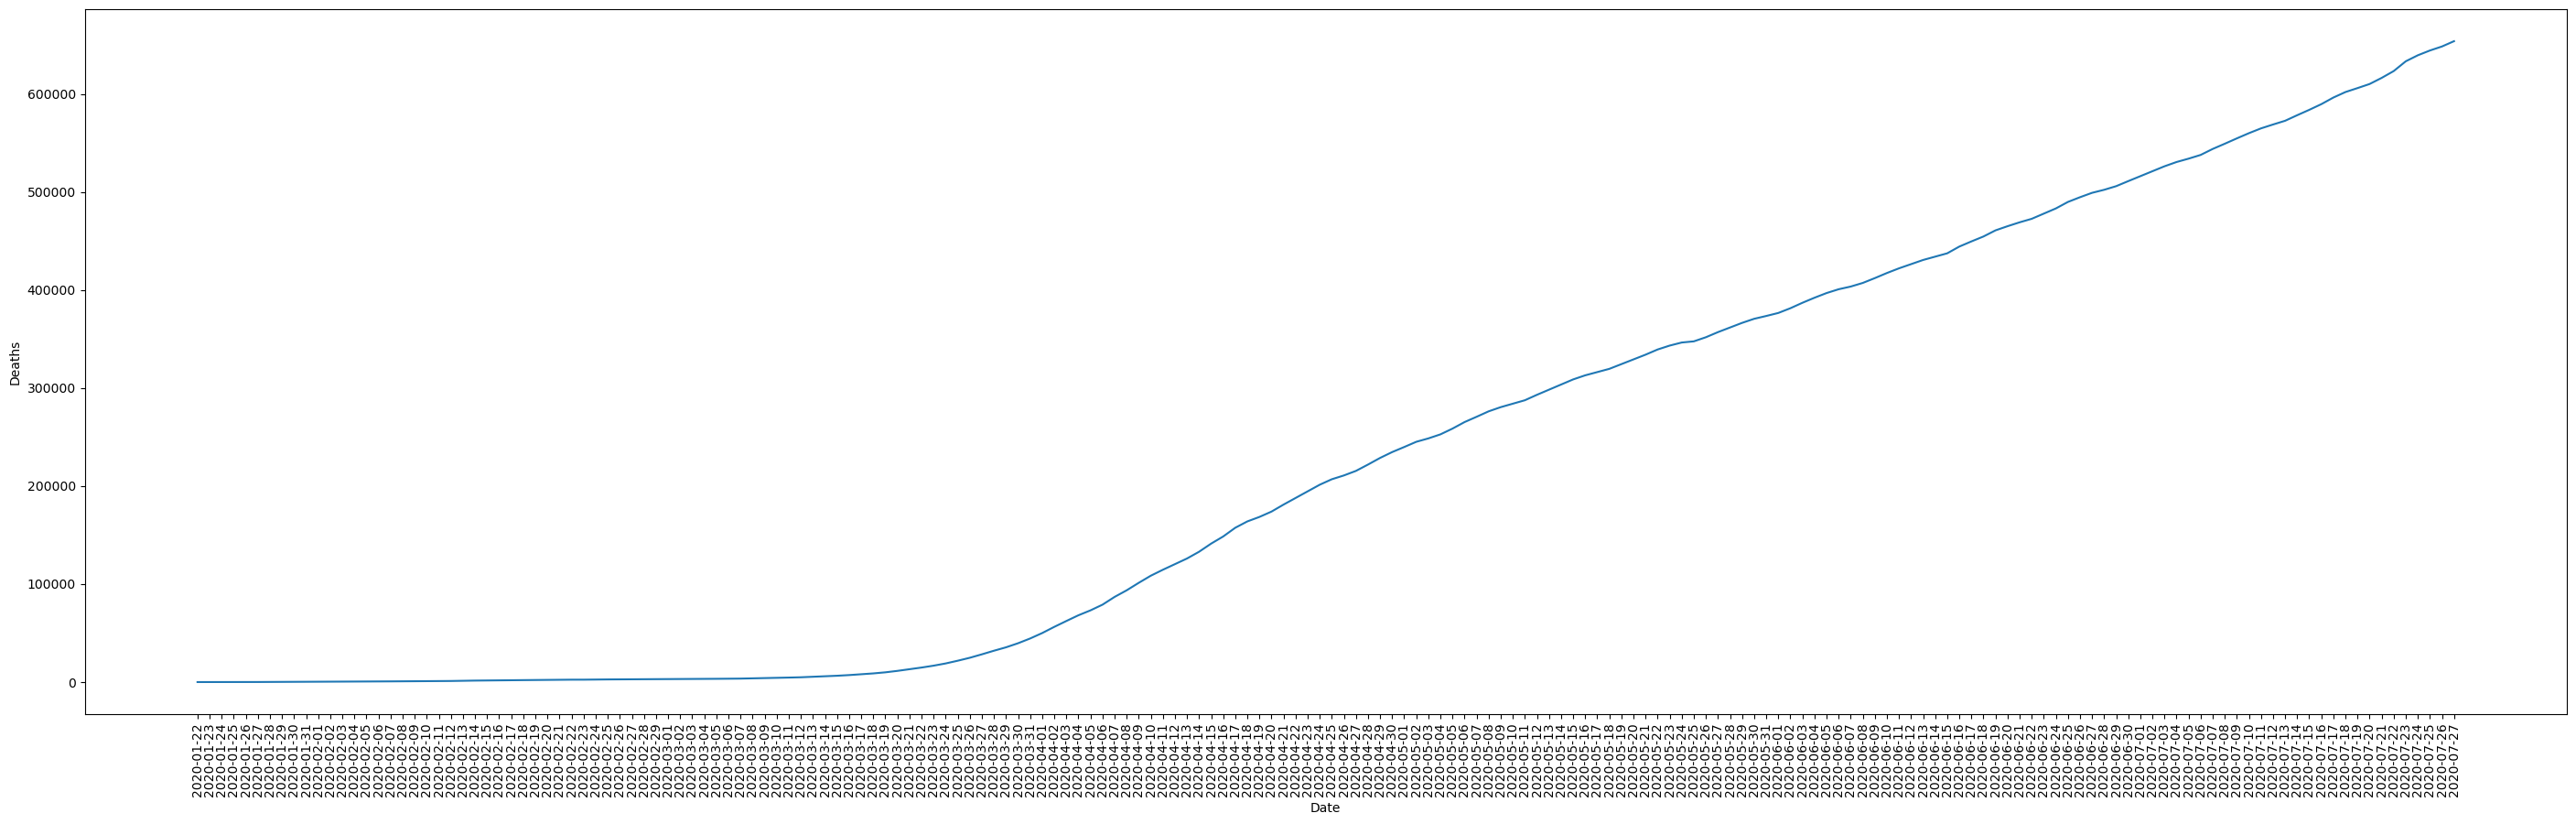

In [238]:
plt.figure(figsize=(35,10))
sns.lineplot(data=death,x= 'Date', y= 'Deaths')
plt.xticks(rotation=90)
plt.show()

same deaths also increasing

In [239]:
active=df.groupby("Date")['Active'].sum().reset_index()

In [240]:
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


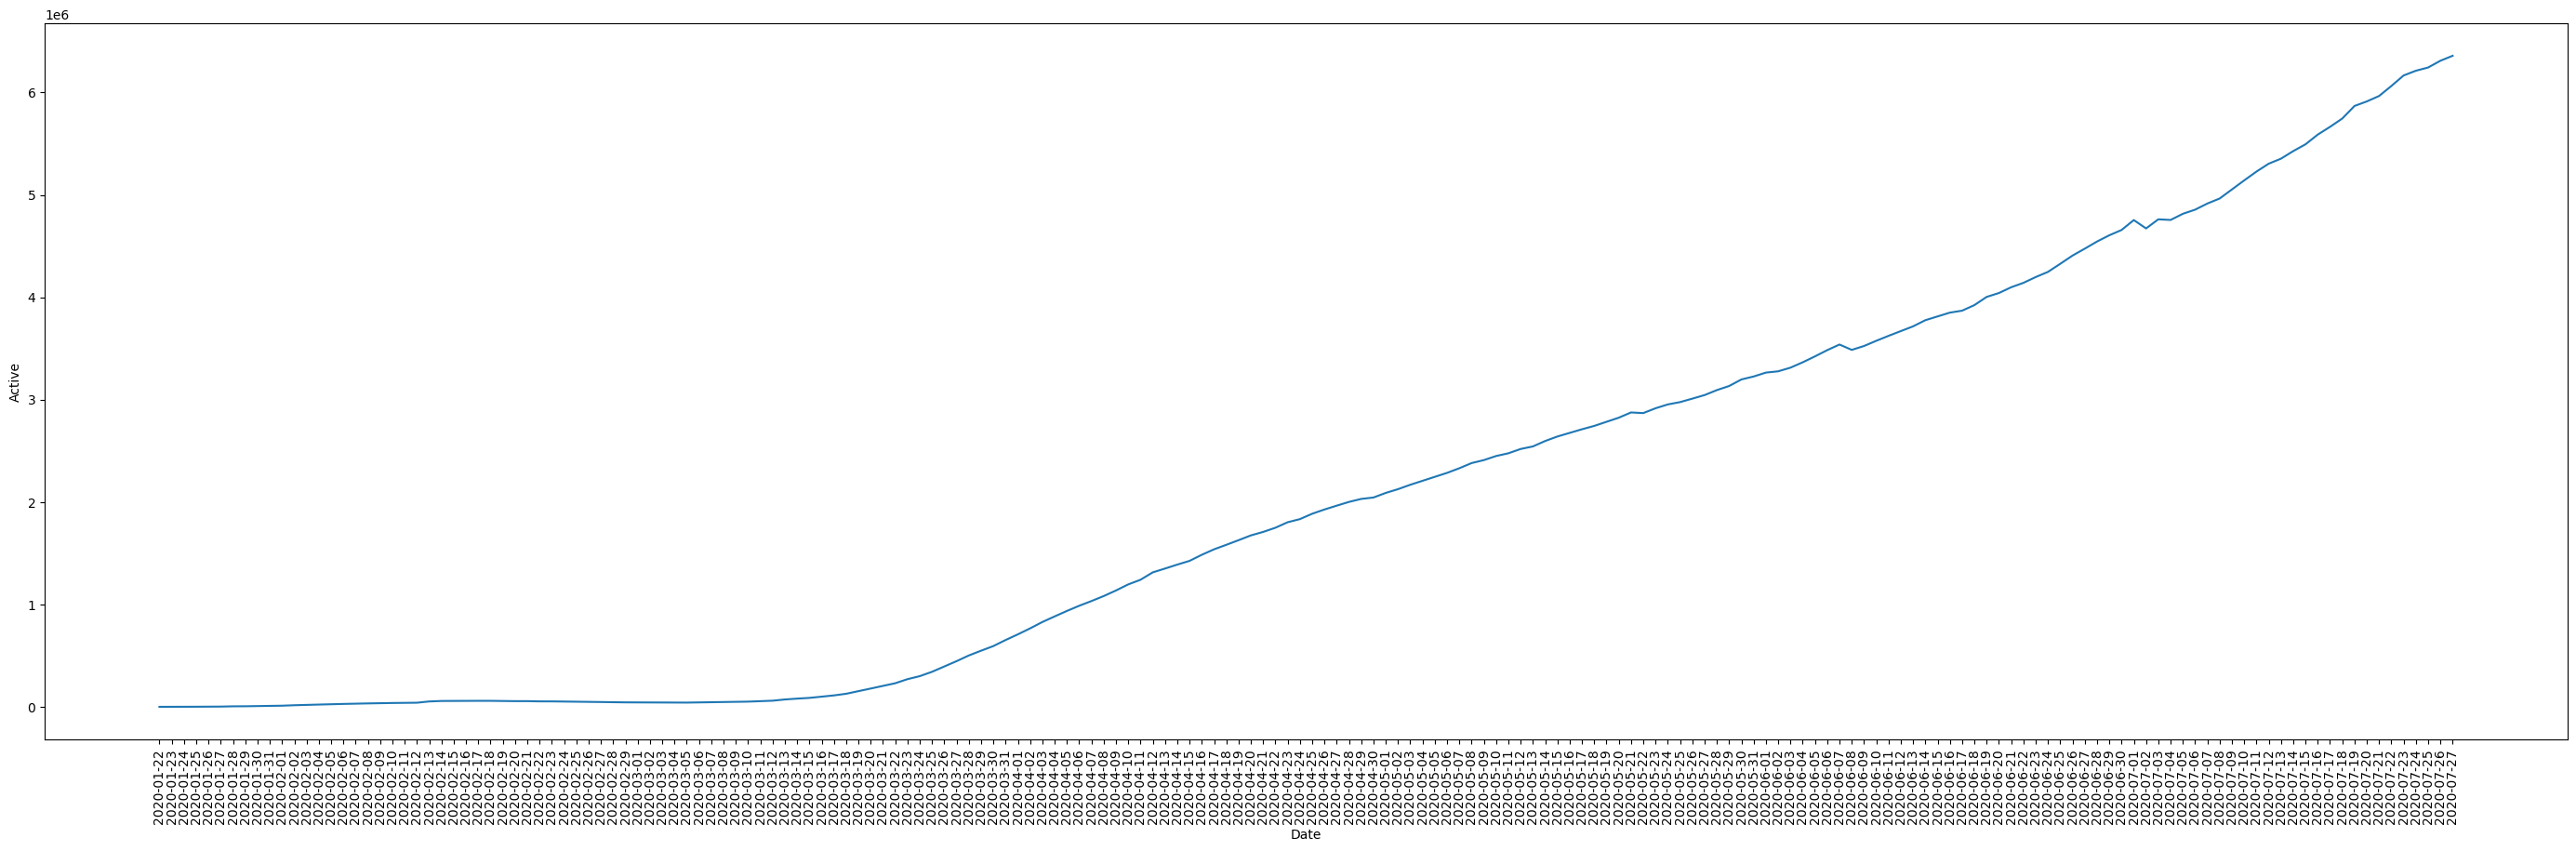

In [241]:
plt.figure(figsize=(35,10))
sns.lineplot(data=active,x= 'Date', y= 'Active')
plt.xticks(rotation=90)
plt.show()

actives are also increasing

In [242]:
recovery=df.groupby("Date")['Recovered'].sum().reset_index()

In [243]:
recovery

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


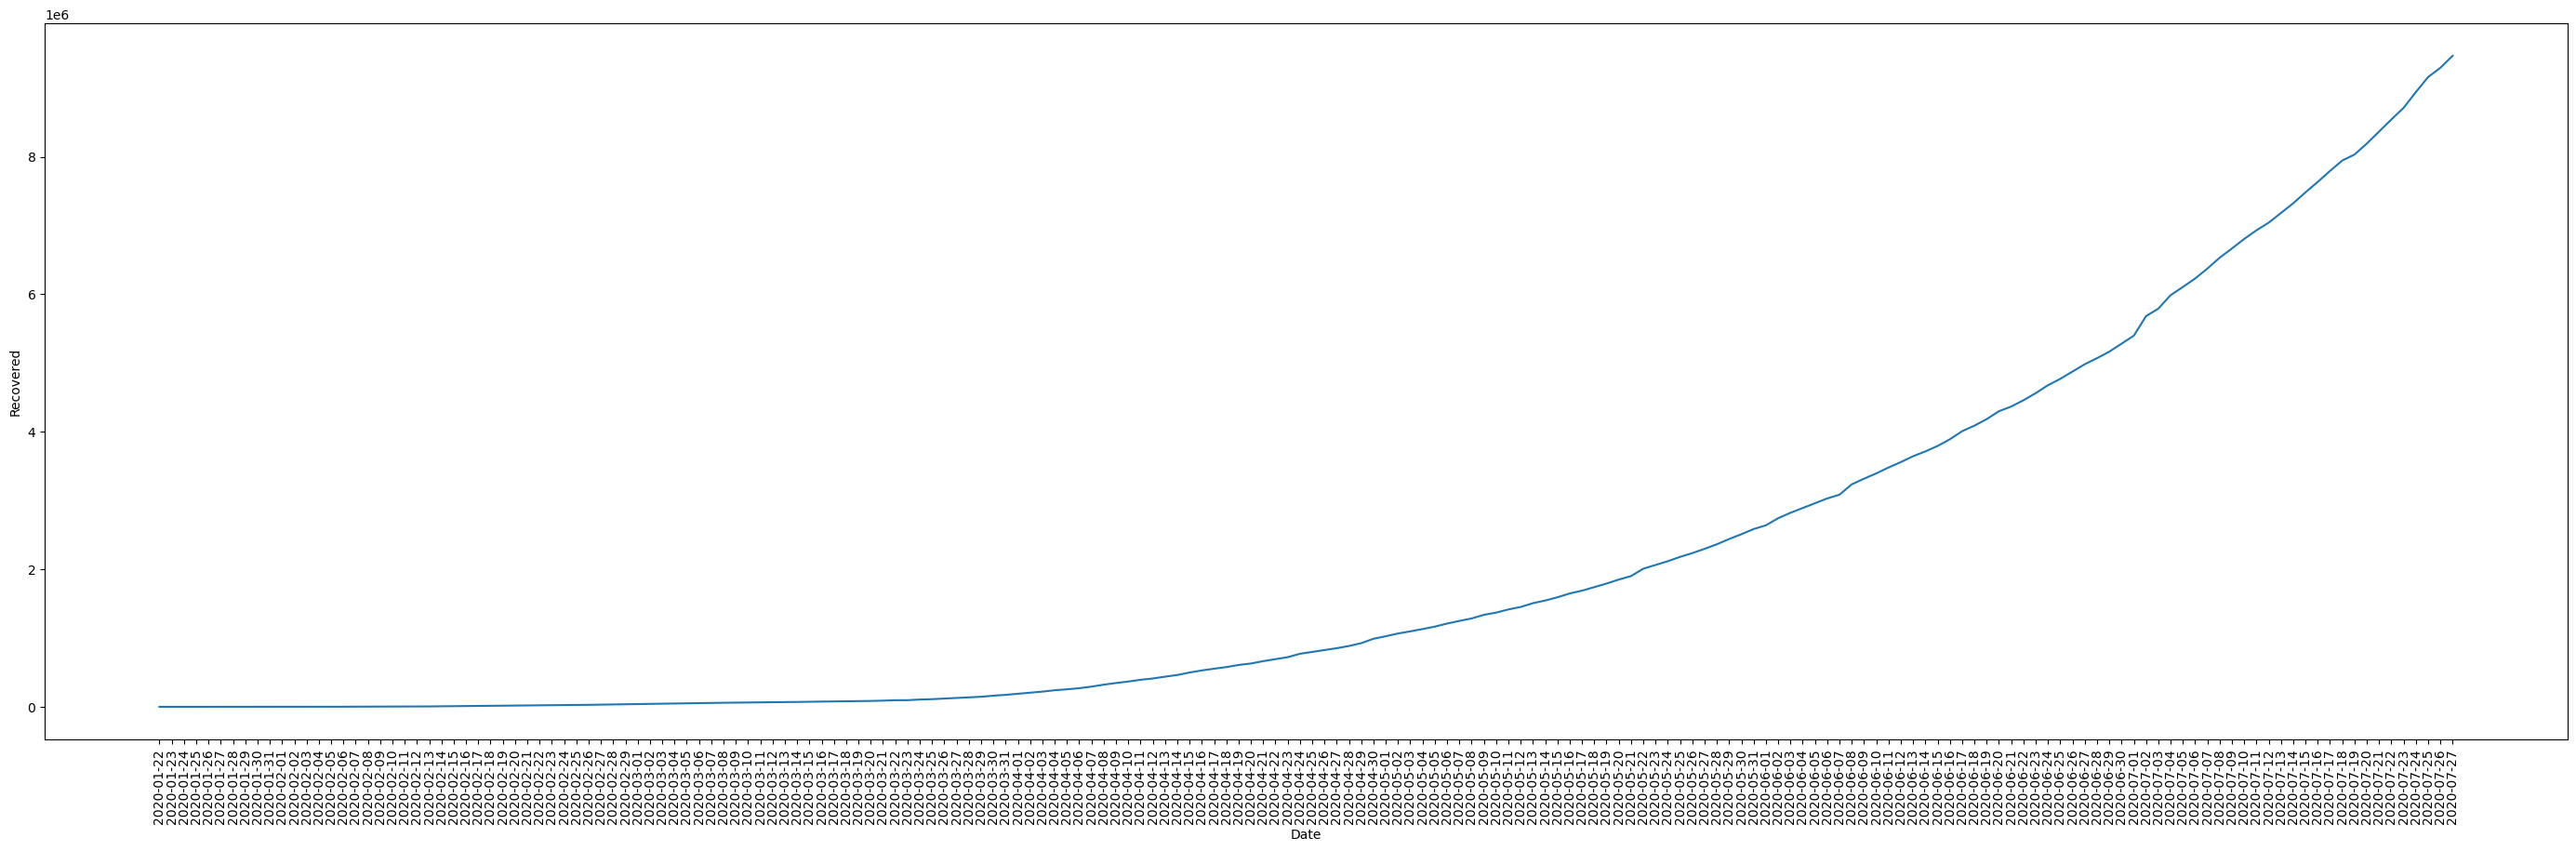

In [244]:
plt.figure(figsize=(35,10))
sns.lineplot(data=recovery,x= 'Date', y= 'Recovered')
plt.xticks(rotation=90)
plt.show()

Also recovered cases

Top 10 countries with recovery

In [245]:
top_10_rec=df.groupby(by='Country')['Recovered'].sum()

In [246]:
top_10_rec.sort_values(ascending=False, inplace=True)

In [247]:
top_10_rec.head(10)

Country
US         56353416
Brazil     54492873
Russia     25120448
India      23783720
Germany    17107839
Italy      15673910
Iran       15200895
Spain      15093583
Turkey     13345389
Chile      13292593
Name: Recovered, dtype: int64

Top 10 countries with deaths

In [248]:
top_10_rec=df.groupby(by='Country')['Deaths'].sum()
top_10_rec.sort_values(ascending=False, inplace=True)
top_10_rec.head(10)

Country
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64

Top 10 countries with Active

In [249]:
top_10_rec=df.groupby(by='Country')['Active'].sum()
top_10_rec.sort_values(ascending=False, inplace=True)
top_10_rec.head(10)

Country
US                156981121
Brazil             31094060
United Kingdom     22624595
Russia             19668578
India              15987913
France             10980287
Spain               9277432
Canada              8656985
Peru                7748957
Italy               7363518
Name: Active, dtype: int64

Top 10 countires with Confirmed

In [250]:
top_10_rec=df.groupby(by='Country')['Confirmed'].sum()
top_10_rec.sort_values(ascending=False, inplace=True)
top_10_rec.head(10)

Country
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

Let us check for India data

In [251]:
India=df[df['Country']=='India']
India.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [252]:
India.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia
48936,NaN,India,20.593684,78.96288,2020-07-27,1480073,33408,951166,495499,South-East Asia


Now let us check for US

In [253]:
US=df[df['Country']=='US']
US.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [254]:
US.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas
49030,NaN,US,40.0,-100.0,2020-07-27,4290259,148011,1325804,2816444,Americas


Now let us check for China

In [255]:
China=df[df['Country']=='China']
China.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [256]:
China.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific
48887,Zhejiang,China,29.1832,120.0934,2020-07-27,1270,1,1268,1,Western Pacific


As we compare china has less no of confirmed cases and US have more active.

In [257]:
China_States = China.groupby(by='State')[['Confirmed',	'Deaths',	'Recovered'	,'Active']].mean()
China_States

,Confirmed,Deaths,Recovered,Active
State,,,,
Anhui,917.537234,5.356383,828.553191,83.627660
Beijing,577.191489,7.356383,445.994681,123.840426
Chongqing,541.255319,5.388298,479.441489,56.425532
Fujian,318.377660,0.845745,281.574468,35.957447
Gansu,126.521277,1.813830,112.569149,12.138298
Guangdong,1425.803191,6.771277,1261.223404,157.808511
Guangxi,236.000000,1.787234,207.058511,27.154255
Guizhou,134.792553,1.781915,120.595745,12.414894
Hainan,157.361702,5.281915,137.925532,14.154255


Let us compare the Confirmed cases between India and US

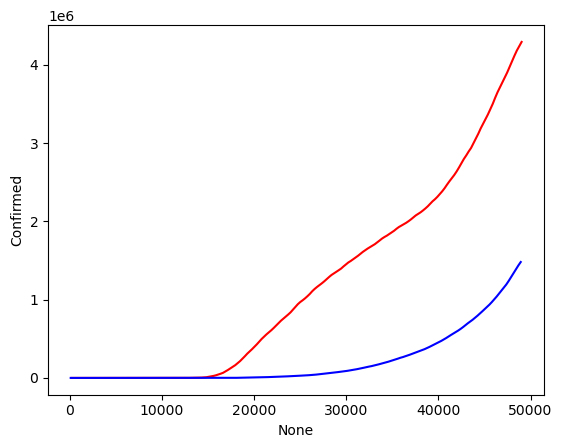

In [258]:
sns.lineplot(data = US, x =US.index, y=US.Confirmed, color = 'Red')
sns.lineplot(data = India, x =India.index, y=India.Confirmed, color = 'Blue')
plt.show()

Now convert Date columns from object to date

In [259]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [260]:
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [261]:
regionCase = top.groupby('WHO Region')[['Confirmed'	,'Deaths'	,'Recovered'	,'Active']].sum().reset_index()

In [262]:
regionCase

,WHO Region,Confirmed,Deaths,Recovered,Active
0,Africa,723207,12223,440645,270339
1,Americas,8839286,342732,4468616,4027938
2,Eastern Mediterranean,1490744,38339,1201400,251005
3,Europe,3299523,211144,1993723,1094656
4,South-East Asia,1835297,41349,1156933,637015
5,Western Pacific,292428,8249,206770,77409


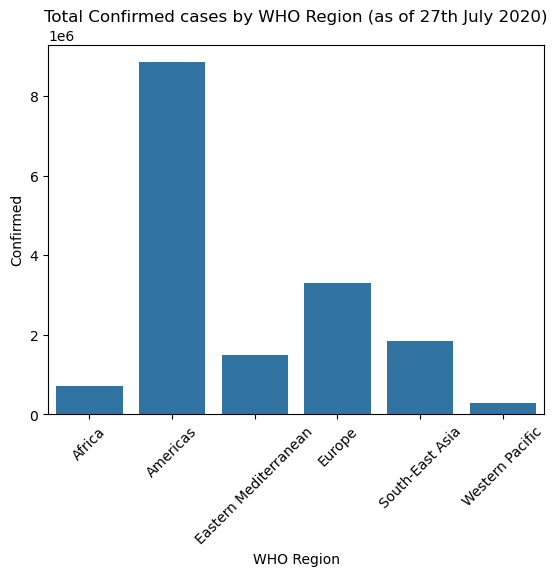

In [263]:
sns.barplot(data=regionCase, x = 'WHO Region', y='Confirmed')
plt.title('Total Confirmed cases by WHO Region (as of 27th July 2020)')
plt.xticks(rotation = 45)
plt.show()

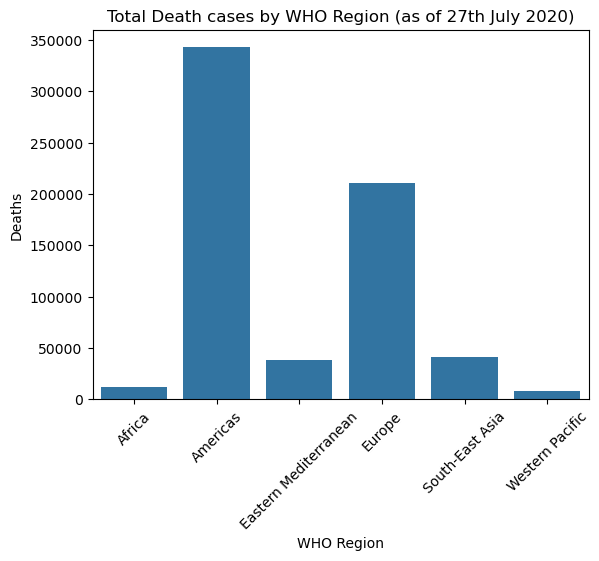

In [264]:
sns.barplot(data=regionCase, x = 'WHO Region', y='Deaths')
plt.title('Total Death cases by WHO Region (as of 27th July 2020)')
plt.xticks(rotation = 45)
plt.show()

In [265]:
WorldLatest = top.groupby('Country')[['Confirmed'	,'Deaths'	,'Recovered']].sum().reset_index()

In [266]:
WorldLatest['Mortality Rate'] = (WorldLatest['Deaths']) / (WorldLatest['Confirmed']) * 100
WorldLatest

,Country,Confirmed,Deaths,Recovered,Mortality Rate
0,Afghanistan,36263,1269,25198,3.499435
1,Albania,4880,144,2745,2.950820
2,Algeria,27973,1163,18837,4.157581
3,Andorra,907,52,803,5.733186
4,Angola,950,41,242,4.315789
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,0.734394
183,Western Sahara,10,1,8,10.000000
184,Yemen,1691,483,833,28.562980
185,Zambia,4552,140,2815,3.075571


Mortality Rate is nothing but the fraction of people dead

In [267]:
WorldLatest['Recovery Rate'] = (WorldLatest['Recovered']) / (WorldLatest['Confirmed']) * 100
WorldLatest

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
0,Afghanistan,36263,1269,25198,3.499435,69.486805
1,Albania,4880,144,2745,2.950820,56.250000
2,Algeria,27973,1163,18837,4.157581,67.339935
3,Andorra,907,52,803,5.733186,88.533627
4,Angola,950,41,242,4.315789,25.473684
...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,0.734394,35.326240
183,Western Sahara,10,1,8,10.000000,80.000000
184,Yemen,1691,483,833,28.562980,49.260792
185,Zambia,4552,140,2815,3.075571,61.840949


Recovery Rate is nothing but the fraction of people recovered

In [268]:
WorldLatest.sort_values(by='Mortality Rate', ascending=False).head(10)

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
184,Yemen,1691,483,833,28.562980,49.260792
177,United Kingdom,301708,45844,1437,15.194824,0.476288
16,Belgium,66428,9822,17452,14.785934,26.272054
85,Italy,246286,35112,198593,14.256596,80.635115
61,France,220352,30212,81212,13.710790,36.855577
77,Hungary,4448,596,3329,13.399281,74.842626
120,Netherlands,53413,6160,189,11.532773,0.353846
111,Mexico,395489,44022,303810,11.131030,76.818824
157,Spain,272421,28432,150376,10.436787,55.199856
183,Western Sahara,10,1,8,10.000000,80.000000


In [269]:
WorldLatest.sort_values(by='Recovery Rate',ascending=False).head(10)

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
75,Holy See,12,0,12,0.000000,100.000000
69,Grenada,23,0,23,0.000000,100.000000
49,Dominica,18,0,18,0.000000,100.000000
48,Djibouti,5059,58,4977,1.146472,98.379126
78,Iceland,1854,10,1823,0.539374,98.327940
24,Brunei,141,3,138,2.127660,97.872340
121,New Zealand,1557,22,1514,1.412974,97.238279
136,Qatar,109597,165,106328,0.150552,97.017254
105,Malaysia,8904,124,8601,1.392633,96.597035
110,Mauritius,344,10,332,2.906977,96.511628


In [270]:
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [271]:
!pip install prophet

In [272]:
confirmed.columns = ['ds','y']
confirmed.head(10)

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [273]:
from prophet import Prophet
m = Prophet()

In [274]:
m.fit(confirmed)

11:36:58 - cmdstanpy - INFO - Chain [1] start processing
11:36:58 - cmdstanpy - INFO - Chain [1] done processing


In [275]:
future = m.make_future_dataframe(periods = 7)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


Before we have 188 rows and we added 7 more rows

In [276]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.356181e+03,-1.215987e+05,8.133427e+04,-9.356181e+03,-9.356181e+03,-10986.215104,-10986.215104,-10986.215104,-10986.215104,-10986.215104,-10986.215104,0.0,0.0,0.0,-2.034240e+04
1,2020-01-23,-6.667726e+03,-1.079952e+05,1.011185e+05,-6.667726e+03,-6.667726e+03,-1078.892495,-1078.892495,-1078.892495,-1078.892495,-1078.892495,-1078.892495,0.0,0.0,0.0,-7.746619e+03
2,2020-01-24,-3.979272e+03,-9.041053e+04,1.037153e+05,-3.979272e+03,-3.979272e+03,10103.254163,10103.254163,10103.254163,10103.254163,10103.254163,10103.254163,0.0,0.0,0.0,6.123982e+03
3,2020-01-25,-1.290817e+03,-9.501879e+04,1.277931e+05,-1.290817e+03,-1.290817e+03,13670.219215,13670.219215,13670.219215,13670.219215,13670.219215,13670.219215,0.0,0.0,0.0,1.237940e+04
4,2020-01-26,1.397637e+03,-9.183009e+04,1.135180e+05,1.397637e+03,1.397637e+03,7218.147794,7218.147794,7218.147794,7218.147794,7218.147794,7218.147794,0.0,0.0,0.0,8.615785e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674928e+07,1.665044e+07,1.685229e+07,1.674352e+07,1.675387e+07,-1078.892495,-1078.892495,-1078.892495,-1078.892495,-1078.892495,-1078.892495,0.0,0.0,0.0,1.674820e+07
191,2020-07-31,1.695352e+07,1.685574e+07,1.706840e+07,1.694146e+07,1.696396e+07,10103.254163,10103.254163,10103.254163,10103.254163,10103.254163,10103.254163,0.0,0.0,0.0,1.696362e+07
192,2020-08-01,1.715776e+07,1.705967e+07,1.727841e+07,1.713503e+07,1.717491e+07,13670.219215,13670.219215,13670.219215,13670.219215,13670.219215,13670.219215,0.0,0.0,0.0,1.717143e+07
193,2020-08-02,1.736200e+07,1.726255e+07,1.748245e+07,1.732992e+07,1.738586e+07,7218.147794,7218.147794,7218.147794,7218.147794,7218.147794,7218.147794,0.0,0.0,0.0,1.736922e+07


In [277]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

Here we only require 
ds= Date,
yhat=predicted(As we see in linear regression, it is the line that gives prediction),
yhat_lower= It is nothing but the range that the line can decrease,
yhat_upper= It is nothing but the range that the line can increase.

In [278]:
forecast[['ds','yhat','yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.034240e+04,-1.215987e+05,8.133427e+04
1,2020-01-23,-7.746619e+03,-1.079952e+05,1.011185e+05
2,2020-01-24,6.123982e+03,-9.041053e+04,1.037153e+05
3,2020-01-25,1.237940e+04,-9.501879e+04,1.277931e+05
4,2020-01-26,8.615785e+03,-9.183009e+04,1.135180e+05
...,...,...,...,...
190,2020-07-30,1.674820e+07,1.665044e+07,1.685229e+07
191,2020-07-31,1.696362e+07,1.685574e+07,1.706840e+07
192,2020-08-01,1.717143e+07,1.705967e+07,1.727841e+07
193,2020-08-02,1.736922e+07,1.726255e+07,1.748245e+07


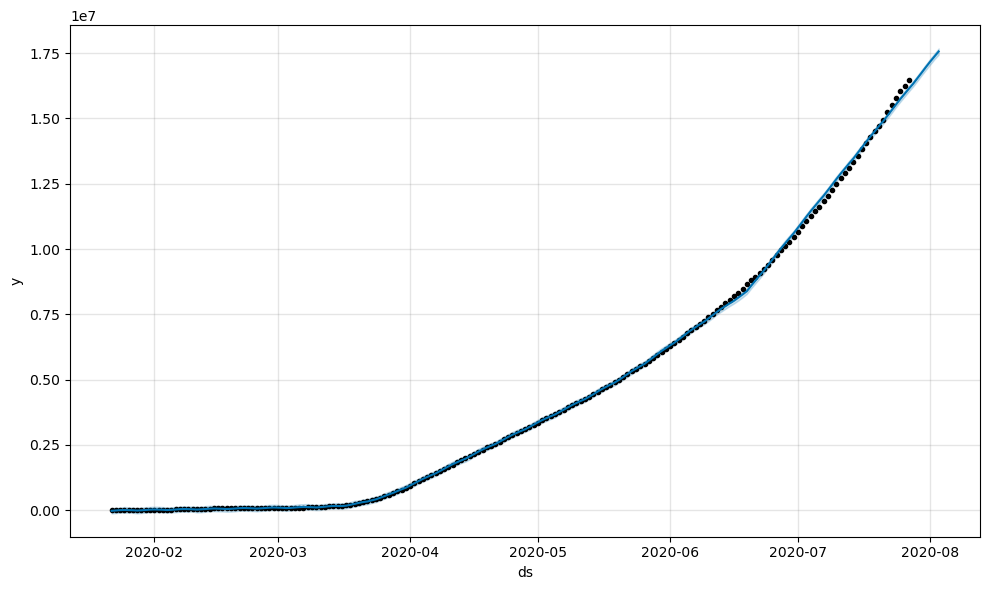

In [279]:
m.plot(forecast)
plt.show()

Here the blue line after the dots at top is my forecasted value

In [280]:
import plotly.express as px

In [281]:
top.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [282]:
world = top.groupby(by='Country')[['Confirmed', 'Deaths',
       'Recovered', 'Active']].sum().reset_index()

In [283]:
world

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [284]:
fig = px.choropleth(world,locations='Country',locationmode='country names',color='Deaths'
                        , hover_name='Country',color_continuous_scale='blues',
                    title='Countries with Death Cases')
fig.show()